In [44]:
import numpy as np



In [45]:
import pandas as pd

$\LARGE Data$  $\LARGE Processiong$      

In [46]:
#data_path = "crimedataset1,xlsx" - 결측치를 각 열의 평균으로 처리할 경우.
# 저장된 코드는 결측치를 제거한 데이터임.

data_path = "crimedataset11.xlsx" 
crime= pd.read_excel(data_path)

In [47]:
crime=crime.dropna(axis=1)

In [48]:
crime = crime.replace("?",None)

In [6]:
#crime=crime.fillna(crime.mean()) 

In [49]:
crime=(crime-crime.mean())/crime.std()

In [50]:
crime.head(10)

,state_numeric,populationnumeric,householdsizenumeric,racepctblacknumeric,racePctWhitenumeric,racePctAsiannumeric,racePctHispnumeric,agePctnumeric,agePcttnumeric,agePctttnumeric,...,NumInSheltersnumeric,NumStreetnumeric,PctForeignBornnumeric,PctBornSameStatenumeric,PctSameHousenumeric,PctSameCitynumeric,PctSameStatenumeric,LandAreanumeric,PctUsePubTransnumeric,ViolentCrimesPerPop_numeric
0,-1.261380,1.043350,-0.814793,-0.629844,0.599427,-0.161248,0.111737,-0.542654,-0.166244,-0.277853,...,0.102934,-0.226876,-0.413403,-0.924451,-0.193271,-0.580608,-0.058165,0.500363,0.167274,-0.163010
1,1.482932,-0.453823,-1.853172,-0.235276,-0.056205,1.418626,-0.318386,-1.058133,0.669623,0.082497,...,-0.286904,-0.226876,-0.024019,-0.532924,-1.075534,-0.131778,-0.663550,-0.413220,1.258716,1.854288
2,-0.285625,-0.453823,-0.265063,1.224624,-0.793790,0.078127,-0.447423,-0.220481,-0.166244,-0.337911,...,-0.286904,-0.226876,-0.326874,-0.581865,0.027294,0.217312,-0.461755,-0.504578,-0.618564,0.824178
3,0.324222,-0.138629,1.872776,3.236918,-2.760686,-0.161248,-0.189349,0.552737,0.042723,0.022439,...,-0.286904,-0.226876,-0.110549,-1.511740,1.074981,0.067702,-0.007717,-0.413220,0.516536,-0.506380
4,0.812100,-0.375024,0.528992,-0.629844,0.804312,-0.304873,-0.404411,-0.284915,-0.793144,-0.638204,...,-0.286904,-0.226876,-0.456668,0.543773,0.578708,-0.081908,-0.613101,-0.230503,-0.618564,-0.892671
5,-1.383350,-0.296226,-1.120198,-0.472017,-0.875744,4.051749,0.455835,-0.735959,-0.096589,-0.397970,...,-0.286904,-0.226876,2.095962,-0.924451,-0.248413,0.516532,-0.058165,-0.504578,-0.269303,-0.420538
6,0.934069,-0.375024,-0.448306,-0.708757,0.927243,-0.448498,-0.533447,-0.800393,-0.862800,-0.638204,...,-0.286904,-0.226876,-0.283609,0.984240,1.295546,1.414192,0.950809,-0.139145,-0.443933,-0.892671
7,-1.383350,-0.375024,1.689533,-0.590387,-1.203560,0.221752,3.681758,0.617171,0.391000,0.142556,...,-0.286904,-0.226876,1.620048,-0.141398,-0.082989,0.815752,0.648116,-0.504578,-0.705879,1.339233
8,-0.468579,-0.217427,-0.753712,0.080378,0.353565,-0.639997,-0.619472,-0.284915,-0.305555,-0.337911,...,-0.189445,-0.226876,-0.889317,0.837418,-0.303554,0.815752,0.496770,-0.230503,-0.531249,1.253391
9,0.019299,-0.375024,-0.387225,-0.472017,0.476496,0.700501,-0.490435,3.065692,2.271701,2.785126,...,-0.286904,-0.226876,0.019246,-0.924451,-1.075534,-1.976967,-2.832843,-0.595936,-0.225645,-0.377616


In [71]:
nX = crime.as_matrix() 
nX = nX.astype(float) # 공통된 데이터

nnX = nX[:,:98] # LAsso를 위한 데이터
npX = nX[:,98] #target

nX1= np.c_[np.ones((1994,1)),nX] # Ridge를 위한 데이터


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [72]:
X=nX1[:,:99]

In [74]:
nnX[:,97]

array([ 0.16727414,  1.25871603, -0.61856401, ...,  0.07995879,
        0.73482392, -0.48759099])

In [76]:
npX

array([-0.16301029,  1.85428781,  0.82417814, ..., -0.03424658,
       -0.20593153,  1.03878432])

In [62]:
X[:,98]

array([ 0.16727414,  1.25871603, -0.61856401, ...,  0.07995879,
        0.73482392, -0.48759099])

In [56]:
predict = nX1[:,99]

In [75]:
predict

array([-0.16301029,  1.85428781,  0.82417814, ..., -0.03424658,
       -0.20593153,  1.03878432])

In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)

In [78]:
def Ridge(X, y,lam):
    lam_par = lam
    xtranspose = np.transpose(X)
    xtransx = np.dot(xtranspose, X)
    lamidentity = np.identity(xtransx.shape[0]) * lam_par
    matinv = np.linalg.inv(lamidentity + xtransx)
    xtransy = np.dot(xtranspose, y)
    wRR = np.dot(matinv, xtransy)
    _, S, _ = np.linalg.svd(X)
    return wRR

In [79]:
def calc_train_error(X_train, y_train):
    A= Ridge(X_train,y_train,lam)
    predictions = np.dot(X_train,A)
    mse = np.sqrt(np.sum(np.square(y_train - predictions)))
    return mse
    
def calc_validation_error(X_test, y_test,X_train,y_train):
    A= Ridge(X_train,y_train,lam)
    predictions = np.dot(X_test,A)
    mse = np.sqrt(np.sum(np.square(y_test - predictions)))*(len(y_train)/len(y_test))
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test,lam):
    #model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train)
    validation_error = calc_validation_error(X_test, y_test,X_train,y_train)
    return train_error, validation_error

In [80]:
Tr1 = nX1[:200,:99] #결측치를 평균으로 처리할 경우 99->118 
Tv1 = nX1[:200,99]
Tr2 = nX1[200:400,:99]
Tv2 = nX1[200:400,99]
Tr3 = nX1[400:600,:99]
Tv3 = nX1[400:600,99]
Tr4 = nX1[600:800,:99]
Tv4 = nX1[600:800,99]
Tr5 =  nX1[800:1000,:99]
Tv5 = nX1[800:1000,99]
Tr6 = nX1[1000:1200,:99]
Tv6 = nX1[1000:1200,99]
Tr7 = nX1[1200:1400,:99]
Tv7 = nX1[1200:1400,99]
Tr8 = nX1[1400:1600,:99]
Tv8 = nX1[1400:1600,99]
Tr9 = nX1[1600:1800,:99]
Tv9 = nX1[1600:1800,99]
Tr10 = nX1[1800:,:99]
Tv10 = nX1[1800:,99]

In [81]:
Train1 = np.delete(X, [i for i in range(200)], axis=0)
Tval1 = np.delete(predict, [i for i in range(200)], axis=0)
Train2 = np.delete(X, [i for i in range(200,400)], axis=0)
Tval2 = np.delete(predict, [i for i in range(200,400)], axis=0)
Train3 = np.delete(X, [i for i in range(400,600)], axis=0)
Tval3 = np.delete(predict, [i for i in range(400,600)], axis=0)
Train4 = np.delete(X, [i for i in range(600,800)], axis=0)
Tval4 = np.delete(predict, [i for i in range(600,800)], axis=0)
Train5 = np.delete(X, [i for i in range(800,1000)], axis=0)
Tval5 = np.delete(predict, [i for i in range(800,1000)], axis=0)
Train6 = np.delete(X, [i for i in range(1000,1200)], axis=0)
Tval6 = np.delete(predict, [i for i in range(1000,1200)], axis=0)
Train7 = np.delete(X, [i for i in range(1200,1400)], axis=0)
Tval7 = np.delete(predict, [i for i in range(1200,1400)], axis=0)
Train8 =np.delete(X, [i for i in range(1400,1600)], axis=0)
Tval8 =np.delete(predict, [i for i in range(1400,1600)], axis=0)
Train9 = np.delete(X, [i for i in range(1600,1800)], axis=0)
Tval9 = np.delete(predict, [i for i in range(1600,1800)], axis=0)
Train10 = np.delete(X, [i for i in range(1800,len(predict))], axis=0)
Tval10 = np.delete(predict, [i for i in range(1800,len(predict))], axis=0)

TrainSet = [Train1,Train2,Train3,Train4,Train5,Train6,Train7,Train8,Train9,Train10]
TvalSet=[Tval1,Tval2,Tval3,Tval4,Tval5,Tval6,Tval7,Tval8,Tval9,Tval10]

In [82]:

TargetSet=[Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7,Tr8,Tr9,Tr10]
TavalSet=[Tv1,Tv2,Tv3,Tv4,Tv5,Tv6,Tv7,Tv8,Tv9,Tv10]

$\LARGE 10\ fold\ Validation$

In [86]:
#lamdas = np.logspace(0,30,50)

# 변경가능

lamdas = np.linspace(40,80,10)

MSE_list = []
for lam in lamdas:
    train_errors = []
    validation_errors = []
    for i in range(10):
        
        
        X_train, X_val = TrainSet[i], TargetSet[i]
        y_train, y_val = TvalSet[i], TavalSet[i]

        
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val,lam)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)

    MSE_list.append(min(validation_errors))
    # generate report
    print('lam: {:6} | min(train_error): {:7} | min(val_error): {}'.
        format(lam,
                round(np.min(train_errors),4),
                round(np.min(validation_errors),4)))

lam:   40.0 | min(train_error): 23.0868 | min(val_error): 65.0016
lam: 44.44444444444444 | min(train_error): 23.1081 | min(val_error): 64.9951
lam: 48.888888888888886 | min(train_error): 23.1284 | min(val_error): 64.9943
lam: 53.333333333333336 | min(train_error): 23.1478 | min(val_error): 64.9978
lam: 57.77777777777778 | min(train_error): 23.1664 | min(val_error): 65.0048
lam: 62.22222222222222 | min(train_error): 23.1843 | min(val_error): 65.0145
lam: 66.66666666666667 | min(train_error): 23.2014 | min(val_error): 65.0265
lam: 71.11111111111111 | min(train_error): 23.2179 | min(val_error): 65.0402
lam: 75.55555555555556 | min(train_error): 23.2337 | min(val_error): 65.0554
lam:   80.0 | min(train_error): 23.2491 | min(val_error): 65.0718


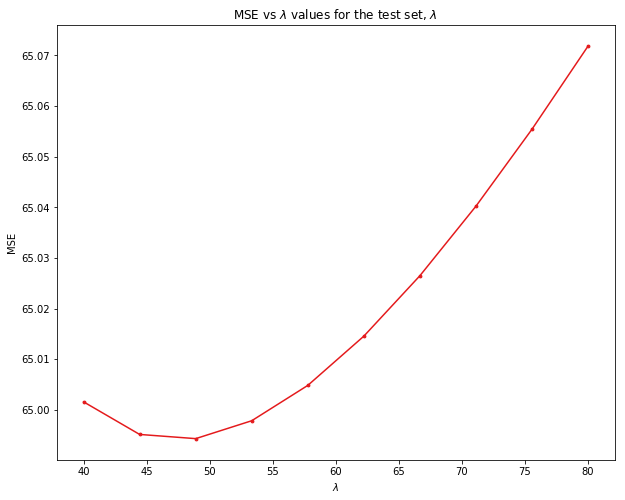

In [87]:
def plotRMSEValue(lamdas,RMSE_list):
    colors = ['#e41a1c']
    plt.plot(lamdas, MSE_list, color = colors[0])
    plt.scatter(lamdas, MSE_list, color = colors[0] , s = 8)
    # df(lambda)
    plt.xlabel("$\lambda$")
    plt.ylabel("MSE")
    # and a legend
    plt.title(r"MSE vs $\lambda$ values for the test set, $\lambda$ ")
plt.figure()
plotRMSEValue(lamdas,MSE_list)
plt.show()

$\large 적절한\ 규제가\ 있을때,\ MSE가\ 최소가\ 된다.(RMSE이지만\ 편의상\ MSE로\ 쓰겠음)$


$\large 따라서\ 주어진\ 데이터는\ 상당한\ multi-colinearility를\ 가짐을\ 알\ 수\ 있다.$

$\large 또한\ 훈련데이터에\ 대한\ MSE와\ 검증데이터에\ 대한\ MSE는\ 약\ 3배가\ 차이가\ 난다.$

$\large 이것은\ validation을\ 위해\ 데이터\ 세트를\ k겹으로\ 나눌때\ 발생하는\ 결과이다.$


$\large 적절한\ k를\ 찾아서\ 이\ 차이를\ 줄일\ 수\ 있을\ 것이다.$

.

.

$\LARGE Lasso $ 

In [88]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def lasso(theta,X,y,lamda = .01, num_iters=50, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before

    y = y.reshape(-1,1)
    
    for i in range(num_iters): 
        
        for j in range(n):
            
            X_j = X[:,j].reshape(-1,1)
            y_pred = np.dot(X,theta)
            rho = np.dot(X_j.T, (y - y_pred  + theta[j]*X_j))
        
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

$\Large Lasso\ code\ explanation$


$\large The\ Lasso\ cost\ function\ is\ following:$


\begin{aligned}
 RSS^{lasso}(\theta) & = RSS^{OLS}(\theta) + \lambda || \theta ||_1
\\
&= \frac{1}{2} \sum_{i=1}^m \left[y^{(i)} - \sum_{j=0}^n \theta_j  x_j^{(i)}\right]^2 + \lambda \sum_{j=0}^n |\theta_j|
\end{aligned}

$\large Then\ for\ j,$

\begin{aligned} \lambda \sum_{j=0}^n |\theta_j| = \lambda |\theta_j| + \lambda \sum_{k\neq j}^n |\theta_k|
\end{aligned}

\begin{equation}
    \partial_{\theta_j} \lambda \sum_{j=0}^n |\theta_j|  =      \partial_{\theta_j} \lambda |\theta_j|=
    \begin{cases}
      \{ - \lambda \} & \text{if}\ \theta_j < 0 \\
      [ - \lambda , \lambda ] & \text{if}\ \theta_j = 0 \\
      \{  \lambda \} & \text{if}\ \theta_j > 0 
    \end{cases}
  \end{equation}

\begin{aligned}
     \frac{\partial }{\partial \theta_j} RSS^{OLS}(\theta) & = -  \sum_{i=1}^m x_j^{(i)}  \left[y^{(i)} - \sum_{j=0}^n \theta_j x_j^{(i)}\right]
     \\
     & = -  \sum_{i=1}^m x_j^{(i)}  \left[y^{(i)} - \sum_{k \neq j}^n \theta_k x_k^{(i)} - \theta_j x_j^{(i)}\right]
     \\
     & = -  \sum_{i=1}^m x_j^{(i)} \left[y^{(i)} - \sum_{k \neq j}^n \theta_k x_k^{(i)} \right] +  \theta_j \sum_{i=1}^m (x_j^{(i)})^2
\\
& \triangleq - \rho_j + \theta_j z_j
\end{aligned}

$\large To\ obtain\ the\ minimum(convex),\ each\ partial\ derivative\ must\ be\ zero.$

\begin{aligned}
    \partial_{\theta_j} RSS^{lasso}(\theta)  &=     \partial_{\theta_j} RSS^{OLS}(\theta) + \partial_{\theta_j} \lambda || \theta ||_1 
    \\
    0 & = -\rho_j + \theta_j z_j + \partial_{\theta_j} \lambda || \theta_j || 
    \\
    0 & =     \begin{cases}
       -\rho_j + \theta_j z_j  - \lambda & \text{if}\ \theta_j < 0 \\
        [-\rho_j  - \lambda ,-\rho_j + \lambda ] & \text{if}\ \theta_j = 0 \\
       -\rho_j + \theta_j z_j +  \lambda  & \text{if}\ \theta_j > 0 
    \end{cases}
\end{aligned}

$\large Then\ we\ obtain\ the\ following:$

\begin{aligned}
     \begin{cases}
       \theta_j = \frac{\rho_j + \lambda}{z_j}  & \text{for} \ \rho_j < - \lambda \\
       \theta_j = 0 & \text{for} \ - \lambda \leq \rho_j \leq \lambda \\
       \theta_j = \frac{\rho_j - \lambda}{z_j}  & \text{for} \ \rho_j > \lambda 
    \end{cases}
\end{aligned}

$\large Note\ that\ \theta_{j}\ can\ be\ zero.$

$\large In\ short,if\; we\ iterate\ this\ process\, $

$\large we\ can\ know\ whether\ \theta_{j}\ has\ a\ meaning\ for\ crime\ or\ not\ for\ each\ j.$ 

In [89]:
def calc_train_error1(X_train, y_train,initial_theta):
    A= lasso(initial_theta,X_train,y_train,lam,num_iters=50)
    predictions = np.dot(X_train,A)
    mse = np.sqrt(np.sum(np.square(y_train - predictions)))
    return mse
    
def calc_validation_error1(X_test, y_test,X_train,y_train,initial_theta):
    A= lasso(initial_theta,X_train,y_train,lam,num_iters=50)
    predictions = np.dot(X_test,A)
    mse = np.sqrt(np.sum(np.square(y_test - predictions)))*(len(y_train)/len(y_test))
    return mse
    
def calc_metrics1(X_train, y_train, X_test, y_test,lam,initial_theta):
    #model.fit(X_train, y_train)
    train_error = calc_train_error1(X_train, y_train,initial_theta)
    validation_error = calc_validation_error1(X_test, y_test,X_train,y_train,initial_theta)
    return train_error, validation_error

In [90]:
#nX를 가져와야함
#평균으로 처리할 경우 98->117, 99->118

LTr1 = nX[:200,:98]
LTv1 = nX1[:200,99]
LTr2 = nX[200:400,:98]
LTv2 = nX1[200:400,99]
LTr3 = nX[400:600,:98]
LTv3 = nX1[400:600,99]
LTr4 = nX[600:800,:98]
LTv4 = nX1[600:800,99]
LTr5 =  nX[800:1000,:98]
LTv5 = nX1[800:1000,99]
LTr6 = nX[1000:1200,:98]
LTv6 = nX1[1000:1200,99]
LTr7 = nX[1200:1400,:98]
LTv7 = nX1[1200:1400,99]
LTr8 = nX[1400:1600,:98]
LTv8 = nX1[1400:1600,99]
LTr9 = nX[1600:1800,:98]
LTv9 = nX1[1600:1800,99]
LTr10 = nX[1800:,:98]
LTv10 = nX1[1800:,99]

In [91]:
LTrain1 = np.delete(nnX, [i for i in range(200)], axis=0)
LTval1 = np.delete(predict, [i for i in range(200)], axis=0)
LTrain2 = np.delete(nnX, [i for i in range(200,400)], axis=0)
LTval2 = np.delete(predict, [i for i in range(200,400)], axis=0)
LTrain3 = np.delete(nnX, [i for i in range(400,600)], axis=0)
LTval3 = np.delete(predict, [i for i in range(400,600)], axis=0)
LTrain4 = np.delete(nnX, [i for i in range(600,800)], axis=0)
LTval4 = np.delete(predict, [i for i in range(600,800)], axis=0)
LTrain5 = np.delete(nnX, [i for i in range(800,1000)], axis=0)
LTval5 = np.delete(predict, [i for i in range(800,1000)], axis=0)
LTrain6 = np.delete(nnX, [i for i in range(1000,1200)], axis=0)
LTval6 = np.delete(predict, [i for i in range(1000,1200)], axis=0)
LTrain7 = np.delete(nnX, [i for i in range(1200,1400)], axis=0)
LTval7 = np.delete(predict, [i for i in range(1200,1400)], axis=0)
LTrain8 =np.delete(nnX, [i for i in range(1400,1600)], axis=0)
LTval8 =np.delete(predict, [i for i in range(1400,1600)], axis=0)
LTrain9 = np.delete(nnX, [i for i in range(1600,1800)], axis=0)
LTval9 = np.delete(predict, [i for i in range(1600,1800)], axis=0)
LTrain10 = np.delete(nnX, [i for i in range(1800,len(predict))], axis=0)
LTval10 = np.delete(predict, [i for i in range(1800,len(predict))], axis=0)

In [92]:

LTrainSet = [LTrain1,LTrain2,LTrain3,LTrain4,LTrain5,LTrain6,LTrain7,LTrain8,LTrain9,LTrain10]
LTvalSet=[LTval1,LTval2,LTval3,LTval4,LTval5,LTval6,LTval7,LTval8,LTval9,LTval10]
LTargetSet=[LTr1,LTr2,LTr3,LTr4,LTr5,LTr6,LTr7,LTr8,LTr9,LTr10]
LTavalSet=[LTv1,LTv2,LTv3,LTv4,LTv5,LTv6,LTv7,LTv8,LTv9,LTv10]

In [93]:
#lamdas = np.logspace(0,30,50) # 20은 변경가능
lamdas = np.linspace(0,50,20)

MSE_list = []
for lam in lamdas:
    train_errors = []
    validation_errors = []
    for i in range(10):
        
        
        X_train, X_val = LTrainSet[i], LTargetSet[i]
        y_train, y_val = LTvalSet[i], LTavalSet[i]
        t,s = LTrainSet[i].shape
        initial_theta = np.ones((s,1))

        
        train_error, val_error = calc_metrics1(X_train, y_train, X_val, y_val,lam,initial_theta)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)

    MSE_list.append(min(validation_errors))
    # generate report
    print('lam: {:6} | min(train_error): {:7} | min(val_error): {}'.
        format(lam,
                round(np.min(train_errors),4),
                round(np.min(validation_errors),4)))

lam:    0.0 | min(train_error): 1436.64 | min(val_error): 3919.0516
lam: 2.6315789473684212 | min(train_error): 1236.3153 | min(val_error): 3450.1463
lam: 5.2631578947368425 | min(train_error): 1102.8961 | min(val_error): 3086.3807
lam: 7.894736842105264 | min(train_error): 977.7253 | min(val_error): 2745.7607
lam: 10.526315789473685 | min(train_error): 857.102 | min(val_error): 2415.3729
lam: 13.157894736842106 | min(train_error): 738.5364 | min(val_error): 2084.8802
lam: 15.789473684210527 | min(train_error): 620.3362 | min(val_error): 1755.8539
lam: 18.42105263157895 | min(train_error): 502.8699 | min(val_error): 1429.3071
lam: 21.05263157894737 | min(train_error): 387.106 | min(val_error): 1107.4352
lam: 23.68421052631579 | min(train_error): 275.1279 | min(val_error): 795.9303
lam: 26.315789473684212 | min(train_error): 165.1992 | min(val_error): 498.2547
lam: 28.947368421052634 | min(train_error): 59.2058 | min(val_error): 173.4421
lam: 31.578947368421055 | min(train_error): 37.88

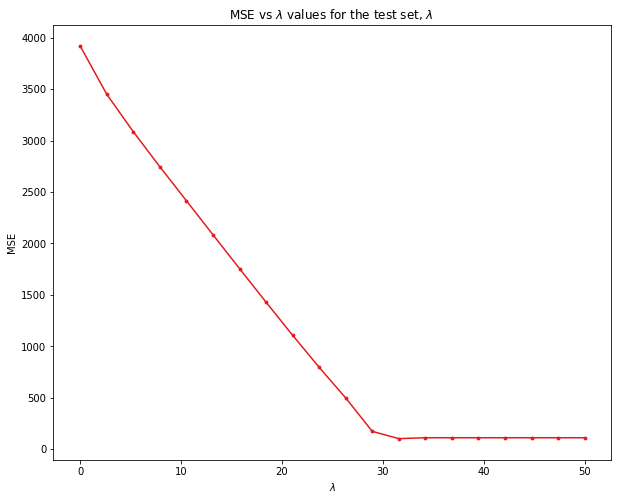

In [94]:
def plotRMSEValue1(lamdas,RMSE_list):
    colors = ['#e41a1c']
    plt.plot(lamdas, MSE_list, color = colors[0])
    plt.scatter(lamdas, MSE_list, color = colors[0] , s = 8)
    # df(lambda)
    plt.xlabel("$\lambda$")
    plt.ylabel("MSE")
    # and a legend
    plt.title(r"MSE vs $\lambda$ values for the test set, $\lambda$ ")
plt.figure()
plotRMSEValue1(lamdas,MSE_list)
plt.show()

$\large Lasso\ Regression\ 에서는$

$\large적절한\ gradient\ 구할\ 수\ 없기\ 때문에\ Optimization\ Algorithm을\ 이용했다.$

$\large 따라서\ Optimziation을\ 위한\ Hyperparameter가\ 필요하기\ 때문에$

$\large Ridge\ Regression의\ 
경우보다\ 더\ 계산량이\ 많아진다는\ 단점이\ 있다.$


$\large 또\ Hyperparameter를\ 적절히\ 튜닝을\ 해야하는\ 문제가\ 있다.$

$\large 그러나\ Bayesian의\ 관점에서\ 보면\ 주어진\ 데이터에\ 적절한\ 회귀분석법은\ Lasso인듯\ 하다.$

$\large Lasso는\ 변수들이\ Laplace\ 분포를\ 따른다고\ 판단될\ 때\ 적절한\ 분석법이다.$

$\large 범죄율\ 데이터\ 분석을\ 위한\ 변수에\ 관한\ 적절한\ 가정은\ Normal분포가\ 아니라\ Laplace분포일\ 것이다. $

$\large 또\ 범죄율에\ 영향을\ 주는\ 변수들은\ 범죄율에\ 영향을\ 주거나\ 아니면\ 전혀\ 주지\ 않는다고 $

$\large 전제하는것은\ 모델링을\ 위한\ 적절한\ 가정인\ 듯\ 하다.$


$\large 따라서\ 회귀계수가\ 0이\ 될\ 수\ 있다고\ 생각해야\ 하므로\ Lasso가\ Ridge\ 보다\ 더\ 적절할 수 있다.$

$\large 구체적인\ 근거는\ 다음과\ 같다.$ 

$\large 결측치를\ 가진\ 데이터\ 열을\ 평균치로\ 처리한\ 경우와\ 결측치\ 데이터를\ 가진\ 열을\ 제거한경우와 $

$\large Lasso분석은\ 같은\ 결과를\ 내놓았다.\ 제거된\ 변수들은\ 범죄율에\ 큰\ 영향이\ 없음을\ 시사한다.$

.

$\LARGE Elastic\ Net$

$\large Consider\ J(\beta)={\Vert y - X\beta\Vert}^{2} + \lambda{\Vert \beta \Vert}^{2} + (1-\lambda)\vert\beta\vert$

$\large Let\ X_{\lambda}= \ {1 \over (1+\lambda^{2})} \begin{pmatrix} X \\ \sqrt{\lambda} I \end{pmatrix},\ y_\lambda=\begin{pmatrix} y \\ 0_{\lambda} \end{pmatrix}$

$\large Then\ J({1 \over (1+\lambda^{2})} \beta) = {\Vert y_{\lambda} - X_{\lambda}\beta\Vert}^{2} + { 1-\lambda \over 1+\lambda^{2}} \vert\beta\vert$

$\large It\ implies\ solving\ the\ modified\ lasso\ problem\ can\ give\ rescaled\ solution\ for\ original\ problem.$

$\large Lasso가\ 적절히\ 작용하는\ 데이터\ 이기에\ 결과는\ 거의\ 같을 것이다.$